## Part 1: Importing data, creating data frame
Imported scarped data in dataframe from www.energytrend.com. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
titles = pd.read_csv("../title_date.csv", delimiter= '\t\t', names=['title','date'])

/home/aydin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
titles

,title,date
0,Volkswagen Has Created a R2D2-Like Charging Ro...,2021-01-08 18:30
1,"Bullish on Solar Demand, TSEC Invests NT$700 M...",2021-01-07 18:30
2,TrendForce:Prices of Polysilicon Expected to R...,2021-01-07 10:56
3,Tesla Finalizes on Marching Towards the Indian...,2021-01-06 18:30
4,US Congress Gives Renewable Energy Industry a ...,2021-01-06 18:30
...,...,...
9659,"June 9th ~ June 11th, 2010：「Intersolar Europe ...",2010-05-17 14:58
9660,"December 8th ~ December 11th, 2010：SALON INTER...",2010-05-11 16:16
9661,"November 17th~November 19th ,2010: PV Tech 201...",2010-05-10 17:06
9662,"November 2nd ~ November 4th, 2010：Clean Energy...",2010-05-10 12:13


## Part 2: Vader analysis

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [5]:
def analyzer_scores(title):
    score = vader.polarity_scores(title)
    return score, title

In [6]:
analyzer_scores(titles.title[5])

({'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Photovoltaic Industry Price Trend: Cell Prices Decrease under Diminishing M6 Orders as Mono Polysilicon Rise in Volume and Price                            ')

In [7]:
analyzer_scores(titles.title[10])

({'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Apple Car May Be Released in 2024, with the Installation of New-generation Battery Technology                            ')

In [8]:
analyzer_scores(titles.title[200])

({'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Xpeng Motors Announces ~US$500mn Series C+ Financing                            ')

In [16]:
len(vader.make_lex_dict().items())

7506

In [46]:
dir(vader)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_amplify_ep',
 '_amplify_qm',
 '_but_check',
 '_least_check',
 '_negation_check',
 '_punctuation_emphasis',
 '_sentiment_laden_idioms_check',
 '_sift_sentiment_scores',
 '_special_idioms_check',
 'emoji_full_filepath',
 'emojis',
 'lexicon',
 'lexicon_full_filepath',
 'make_emoji_dict',
 'make_lex_dict',
 'polarity_scores',
 'score_valence',
 'sentiment_valence']

In [19]:
# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(titles)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['title'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

,title,date,neg,neu,pos,compound
0,Volkswagen Has Created a R2D2-Like Charging Ro...,2021-01-08,0.000,0.818,0.182,0.2500
1,"Bullish on Solar Demand, TSEC Invests NT$700 M...",2021-01-07,0.086,0.914,0.000,-0.1280
2,TrendForce:Prices of Polysilicon Expected to R...,2021-01-07,0.086,0.914,0.000,-0.1280
3,Tesla Finalizes on Marching Towards the Indian...,2021-01-06,0.000,1.000,0.000,0.0000
4,US Congress Gives Renewable Energy Industry a ...,2021-01-06,0.000,0.593,0.407,0.8225


In [20]:
parsed_and_scored_news.compound.describe()

count    9664.000000
mean        0.157229
std         0.266540
min        -0.865800
25%         0.000000
50%         0.000000
75%         0.340000
max         0.952400
Name: compound, dtype: float64

In [48]:
parsed_and_scored_news.title[parsed_and_scored_news.compound < 0]

1       Bullish on Solar Demand, TSEC Invests NT$700 M...
2       TrendForce:Prices of Polysilicon Expected to R...
7       SolarEdge Targets Large End-Users with Integra...
50      Buying war of silicon, wafers and pvglass     ...
51      Lead-Free Perovskite Solar with No Heavy Metal...
                              ...                        
9513    Texas Town's Waste Goes Green                 ...
9565    Price of Solar Cells in 4Q10 is Estimated to D...
9600    LDK Solar Files Suit against Canadian Solar fo...
9609    Cost of Solar Power Is Expected To Drop Greatl...
9655    EnergyTrend: Silicon Wafer Shortage Leads to C...
Name: title, Length: 581, dtype: object

In [21]:
parsed_and_scored_news.title[1]

'Bullish on Solar Demand, TSEC Invests NT$700 Million to Build a Production Line for Large-Size PV Cells                            '

In [17]:
import matplotlib.pyplot as plt

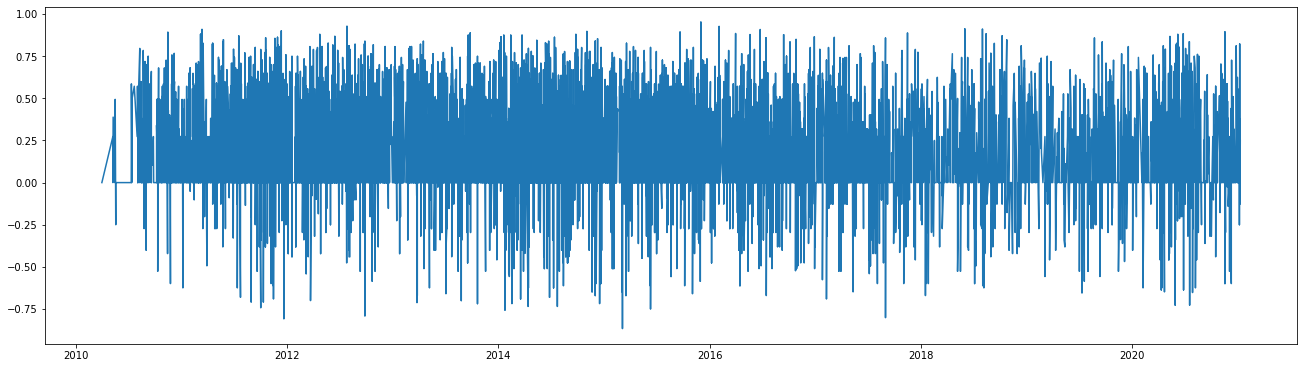

In [23]:
fig, ax = plt.subplots(1,1, figsize=(18,5), constrained_layout=True)
ax.plot(parsed_and_scored_news.date,parsed_and_scored_news.compound)


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(18,5), constrained_layout=True)
ax.plot(total_daily.index.date,total_daily.resample('D').sum()['installation_numbers'])
#plt.xticks(ticks= list(size_df.year.unique())[::2], rotation=45)
plt.title('Total Count of Observations by Day')
plt.show()

In [25]:
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news['date'],utc=True).dt.strftime('%Y-%m-%d')
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news['date'],utc=True)

In [43]:
series=parsed_and_scored_news.set_index('date', drop=False)
series=series[['compound', 'date']]

In [49]:
series.resample('M').sum()

,compound
date,
2010-04-30 00:00:00+00:00,0.0000
2010-05-31 00:00:00+00:00,1.5807
2010-06-30 00:00:00+00:00,0.0000
2010-07-31 00:00:00+00:00,1.9249
2010-08-31 00:00:00+00:00,9.7718
...,...
2020-09-30 00:00:00+00:00,1.4138
2020-10-31 00:00:00+00:00,4.4022
2020-11-30 00:00:00+00:00,8.3015


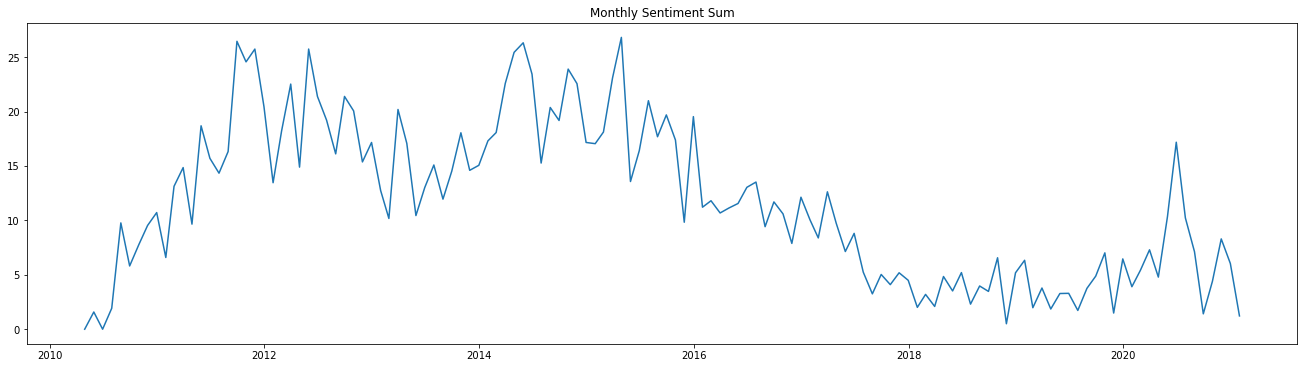

In [58]:
fig, ax = plt.subplots(1,1, figsize=(18,5), constrained_layout=True)
ax.plot(series.resample('M').sum().index.date,series.resample('M').sum())
plt.title('Monthly Sentiment Sum')
plt.show()

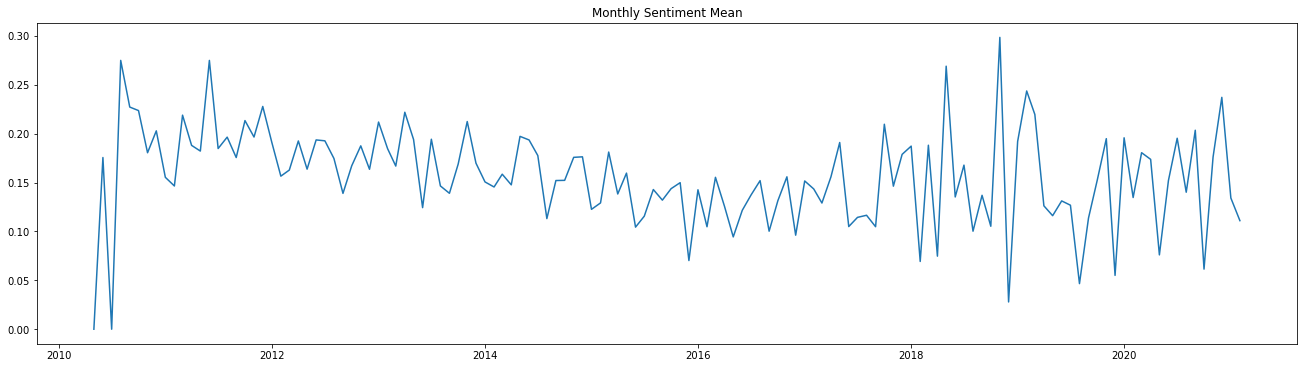

In [57]:
fig, ax = plt.subplots(1,1, figsize=(18,5), constrained_layout=True)
ax.plot(series.resample('M').sum().index.date,series.resample('M').mean())
plt.title('Monthly Sentiment Mean')
plt.show()

In [86]:
series_rolling=series.rolling(5).sum()

In [85]:
series_rolling

,compound
date,
2021-01-08 00:00:00+00:00,NaN
2021-01-07 00:00:00+00:00,NaN
2021-01-07 00:00:00+00:00,NaN
2021-01-06 00:00:00+00:00,NaN
2021-01-06 00:00:00+00:00,0.16330
...,...
2010-05-17 00:00:00+00:00,0.18380
2010-05-11 00:00:00+00:00,0.31150
2010-05-10 00:00:00+00:00,0.21272


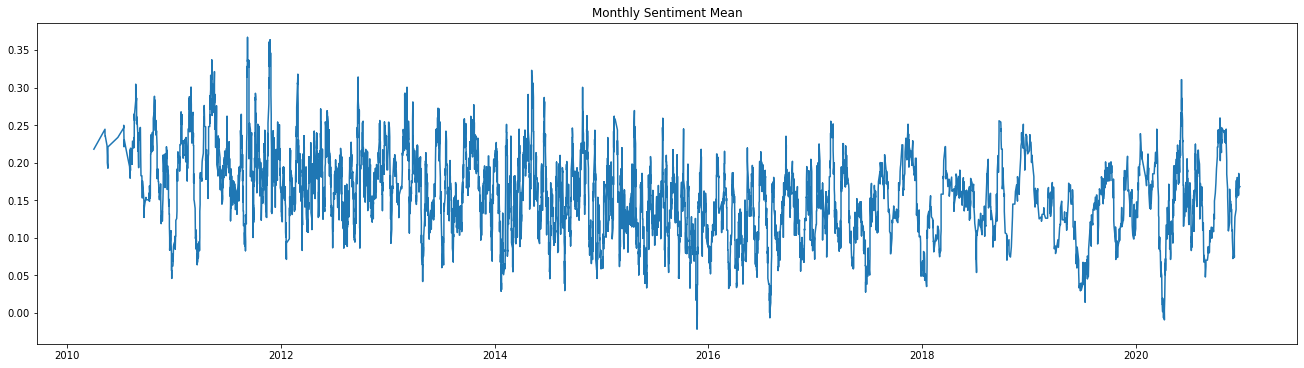

In [68]:
fig, ax = plt.subplots(1,1, figsize=(18,5), constrained_layout=True)
ax.plot(series_rolling.index.date,series_rolling.compound)
plt.title('Monthly Sentiment Mean')
plt.show()

In [87]:
series.rolling('1d').sum()

,compound
date,
2021-01-08 00:00:00+00:00,2.500000e-01
2021-01-07 00:00:00+00:00,-1.280000e-01
2021-01-07 00:00:00+00:00,-2.560000e-01
2021-01-06 00:00:00+00:00,0.000000e+00
2021-01-06 00:00:00+00:00,8.225000e-01
...,...
2010-05-17 00:00:00+00:00,4.019000e-01
2010-05-11 00:00:00+00:00,3.885000e-01
2010-05-10 00:00:00+00:00,-1.221245e-15


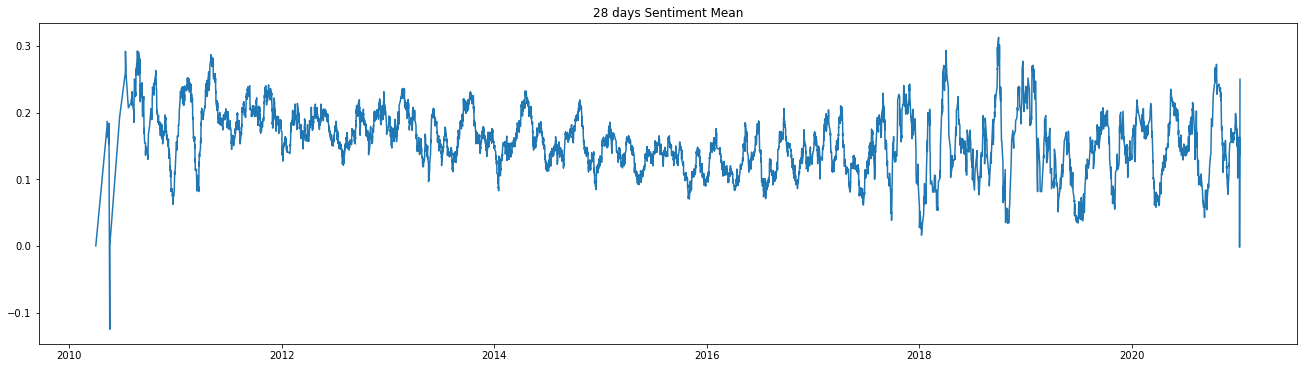

In [110]:
fig, ax = plt.subplots(1,1, figsize=(18,5), constrained_layout=True)
ax.plot(series_rolling.index.date,series.rolling('28d').mean())
plt.title('28 days Sentiment Mean')
plt.show()

In [99]:
series_28_mean = series.rolling('28d').mean()

In [100]:
series_28_sum = series.rolling('28d').sum()

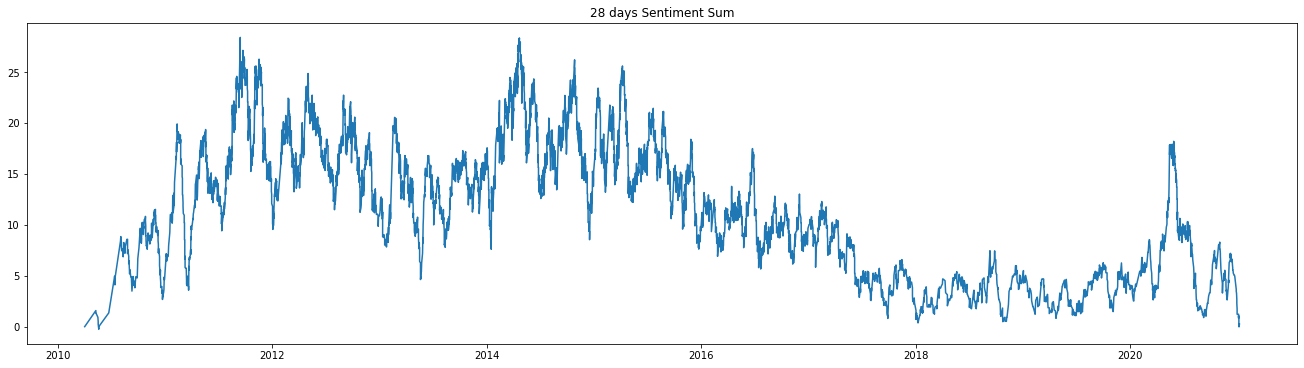

In [109]:
fig, ax = plt.subplots(1,1, figsize=(18,5), constrained_layout=True)
ax.plot(series_rolling.index.date,series.rolling('28d').sum())
plt.title('28 days Sentiment Sum')
plt.show()